# Analysis Dataset

      ¿Qué probabilidad existe de sobrevivir al ataque de un tiburón?

In [21]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt

**Importar DataSet Limpio (CSV):**

In [22]:
data=pd.read_csv('src/attacks_limpio.csv') 
print(data.shape) 
data.head()

(5341, 34)


,Unnamed: 0,Case Number,Date,Year,Time,Country,Area,Location,Type,Activity,...,Fatality summer,Fatality autumn,Fatality winter,Fatality spring,Fatality female,Fatality male,Fatality teens,Fatality young,Fatality adults,Fatality elderly
0,0,2018.06.25,25-Jun-2018,2018.0,18h00,Usa,California,"Oceanside, San Diego County",Boating,Paddling,...,0,0,0,0,0,0,0,0,0,0
1,1,2018.06.18,18-Jun-2018,2018.0,14h00 -15h00,Usa,Georgia,"St. Simon Island, Glynn County",Unprovoked,Standing,...,0,0,0,0,0,0,0,0,0,0
2,2,2018.06.09,09-Jun-2018,2018.0,07h45,Usa,Hawaii,"Habush, Oahu",Invalid,Surfing,...,0,0,0,0,0,0,0,0,0,0
3,3,2018.06.08,08-Jun-2018,2018.0,Notime,Australia,New South Wales,Arrawarra Headland,Unprovoked,Surfing,...,0,0,0,0,0,0,0,0,0,0
4,4,2018.06.04,04-Jun-2018,2018.0,Notime,Mexico,Colima,La Ticla,Provoked,Free diving,...,0,0,0,0,0,0,0,0,0,0



**Eliminar columna "Unnamed: 0"**

In [23]:
data=data.drop(columns="Unnamed: 0")
data.shape

(5341, 33)

In [25]:
data.columns

Index(['Case Number', 'Date', 'Year', 'Time', 'Country', 'Area', 'Location',
       'Type', 'Activity', 'Injury', 'Fatal (Y/N)', 'Species', 'Name', 'Sex',
       'Age', 'Day', 'Month', 'Year2', 'Decade', 'Seasonality',
       'Hemisphere_South', 'Age Category', 'Fatal(%)', 'Fatality summer',
       'Fatality autumn', 'Fatality winter', 'Fatality spring',
       'Fatality female', 'Fatality male', 'Fatality teens', 'Fatality young',
       'Fatality adults', 'Fatality elderly'],
      dtype='object')


**Calcular número total de ataques:**

In [5]:
totalnumber_attacks=data["Name"].count()
totalnumber_attacks
print("El número total de personas atacadas es: "+ str(totalnumber_attacks))

El número total de personas atacadas es: 5341


**Calcular número total de fallecido confirmados:**



In [6]:
totalnumber_fatal=(data["Fatal (Y/N)"]=="Y").sum()
print("El número total de personas fallecidas es: "+ str(totalnumber_fatal))

El número total de personas fallecidas es: 1054


**Comparación total de personas fallecidas vs total personas no fallecidas:**


N    3898
Y    1054
Name: Fatal (Y/N), dtype: int64

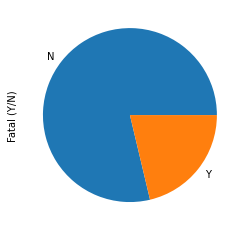

In [7]:
data["Fatal (Y/N)"].value_counts().plot.pie()
data["Fatal (Y/N)"].value_counts()

**Porcentaje total de personas fallecidas:**

In [8]:
fatal_attack_percent=round((totalnumber_fatal/totalnumber_attacks)*100,2)
fatal_attack_percent

print("El porcentaje total de personas fallecidas es: "+ str(fatal_attack_percent)+ "%")

El porcentaje total de personas fallecidas es: 19.73%


*Tras analizar estos datos, encontramos que tan solo el 20% de las personas que han sido atacadas por un tiburón han fallecido. Por lo que, ¿es posible sobrevir al ataque de un tiburón? Si, más de un 80% ha sobrevivido en las últimas decadas.*


**Sin embargo, ¿ha habido siempre el mismo porcentaje de supervivientes a lo largo de los años?**


,Fatal(%)
Decade,
1800,0.474747
1820,0.526316
1840,0.589286
1860,0.427083
1880,0.500000
1900,0.458678
1920,0.325397
1940,0.323917
1960,0.184149


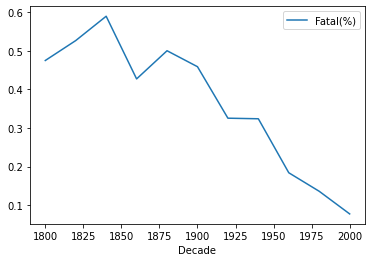

In [9]:
decade_fatal=data.groupby("Decade").agg({"Fatal(%)":"mean"})
decade_fatal.plot.line()
decade_fatal

*Tras analizar estos datos, comprobamos que la probabilidad de sobrevivir a este ataque no siempre ha sido alto, hay decadas anteriores en las que el porcentaje de fallecidos alcanzaba el 50%. Dicho esto, en las últimas decadas, la probabilidad de sobrevivir cada vez es más alta. En los últimos años, el porcentaje es inferior al 10%.*

*Una vez demostrado que la probabilidad de sobrevivir es alta, ¿como afectan estos datos si lo analizamos por categoría de edad, sexo o por estaciones del año?*

**Análisis por Categoria de Edad:**


**Número de personas atacadas por edad:**

Young      1290
Teens      1099
Adults      837
Elderly      54
Name: Age Category, dtype: int64

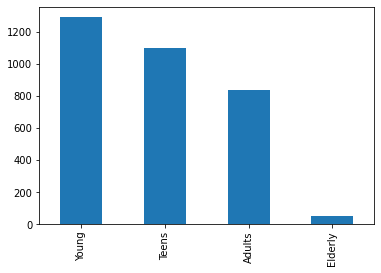

In [10]:
data["Age Category"].value_counts().plot.bar()
data["Age Category"].value_counts()

**Número de personas fallecidas por edad:**

*Columna Sum: representa el número total de personas fallecidas en cada categoria de edad - (Young:235, Teens:197, Adults:127, Elderly:16)*

*Columna Mean: representa el porcentaje de personas por categoria de edad que han fallecido - (Elderly:29%, Young:18%, Teens:17%,Adults:15%)*
    

Fatal(%)          
                  sum      mean
Age Category                   
Adults            127  0.151732
Elderly            16  0.296296
Teens             197  0.179254
Young             235  0.182171

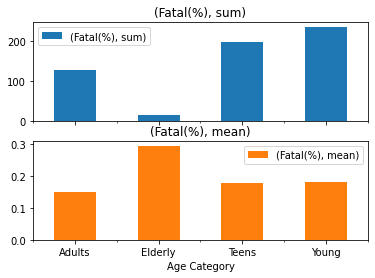

In [11]:
age_fatal=data.groupby("Age Category").agg({"Fatal(%)":["sum","mean"]})
age_fatal.plot.bar(rot=0, subplots=True)
age_fatal

*Tras analizar estos datos por edad, podemos observar que  las categorías más afectadas en número de atacados y fallecidos son los jóvenes y la que menos los ancianos. Sin embargo, la probabilidad de fallecer tras ser atacado por un tiburón es más alta en ancianos, al igual que los adultos tienen una probabilidad de sobrevivir ligeramente mas alta que la de los jóvenes.*


**¿Cúal es la evolución por décadas de la media de fallecidos por Edad?**


,Fatality elderly,Fatality adults,Fatality young,Fatality teens
Decade,,,,
1800,0.000000,0.010101,0.030303,0.030303
1820,0.000000,0.052632,0.000000,0.052632
1840,0.000000,0.000000,0.017857,0.017857
1860,0.000000,0.010417,0.031250,0.062500
1880,0.000000,0.011905,0.053571,0.053571
1900,0.000000,0.020661,0.049587,0.053719
1920,0.002646,0.037037,0.052910,0.097884
1940,0.001883,0.022599,0.088512,0.080979
1960,0.001166,0.026807,0.055944,0.046620


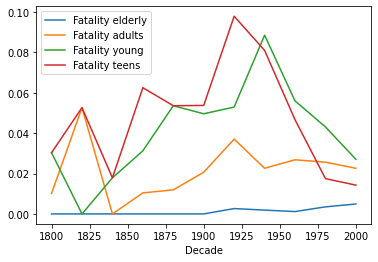

In [12]:
decade_age_fatal=data.groupby(["Decade"]).agg({'Fatality elderly':"mean", 'Fatality adults':"mean",'Fatality young':"mean",'Fatality teens':"mean"})
decade_age_fatal.plot.line()
decade_age_fatal

*Tras analizar estos datos, podemos observar que la media de fallecidos en las diferentes categorías disminuye en las últimas décadas. Hay que resaltar especialmente, la media de "Teens" que disminuye considerablemente.*


**Análisis por Seasonality:**

**Número de personas atacadas por Season:**


Summer    2108
Autumn    1326
Spring     982
Winter     603
Name: Seasonality, dtype: int64

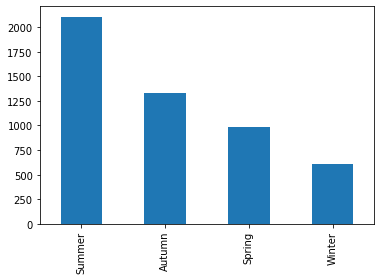

In [13]:
data["Seasonality"].value_counts().plot.bar()
data["Seasonality"].value_counts()

**Número de personas fallecidas por season:**


*Columna Sum: representa el número total de personas fallecidas en cada cada season - (Summer:390, Winter:145)*

*Columna Mean: representa el porcentaje de personas por cada season que han fallecido - (Winter:24%,Autumn:17%)*

Fatal(%)          
                 sum      mean
Seasonality                   
Autumn           233  0.175716
Spring           175  0.178208
Summer           390  0.185009
Winter           145  0.240464

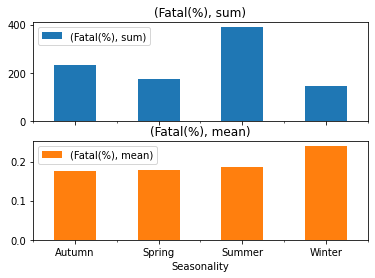

In [14]:
season_fatal=data.groupby('Seasonality').agg({'Fatal(%)':("sum","mean")})
season_fatal.plot.bar(rot=0, subplots=True)
season_fatal

*Tras analizar estos datos por season, podemos observar que Summer es la estación  que más ataques y fallecidos tiene, y Winter es la menos afectada.  Sin embargo, la probabilidad de fallecer tras ser atacado por un tiburón es más alta durante la season de Winter que en Summer.*

**¿Cúal es la evolución por décadas de la media de fallecidos por Season?**

,Fatality spring,Fatality autumn,Fatality winter,Fatality summer
Decade,,,,
1800,0.030303,0.020202,0.000000,0.050505
1820,0.052632,0.000000,0.052632,0.315789
1840,0.107143,0.125000,0.000000,0.267857
1860,0.052083,0.093750,0.020833,0.197917
1880,0.083333,0.071429,0.083333,0.214286
1900,0.078512,0.111570,0.037190,0.198347
1920,0.058201,0.079365,0.034392,0.140212
1940,0.033898,0.065913,0.041431,0.129944
1960,0.030303,0.037296,0.024476,0.082751


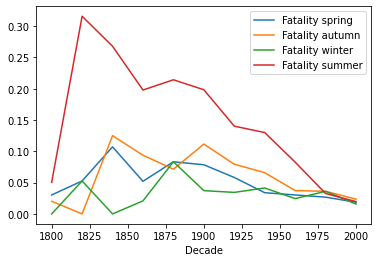

In [15]:
decade_season_fatal=data.groupby(["Decade"]).agg({'Fatality spring':"mean", 'Fatality autumn':"mean",'Fatality winter':"mean",'Fatality summer':"mean"})
decade_season_fatal.plot.line()
decade_season_fatal

*Tras analizar estos datos, podemos observar que la diferencia de fallecidos entre estaciones cada vez es menor en las últimas decadas. En las primeras décadas, la media de fallecidos en la estación de Summer es mucho más elevada que el resto. Sin embargo, en las últimas décadas, la media de fallecidos está cada vez más igualada entre todas las estaciones del año. *

**Análisis por Sex:**

**Número de personas atacadas por Sex:**


M    4534
F     587
Name: Sex, dtype: int64

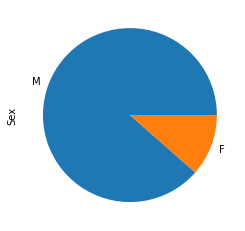

In [16]:
data["Sex"].value_counts().plot.pie()
data["Sex"].value_counts()

**Número de personas fallecidas por Sex:**

Fatal(%)          
         sum      mean
Sex                   
F         94  0.160136
M        943  0.207984

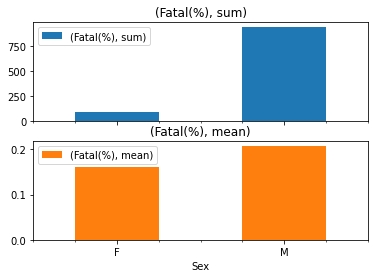

In [17]:
season_fatal=data.groupby('Sex').agg({'Fatal(%)':("sum","mean")})
season_fatal.plot.bar(rot=0, subplots=True)
season_fatal

*Tras analizar estos datos por sexo, podemos observar que el porcentaje de ataques en hombres es mucho más elevado que el de las mujeres. Sin embargo, en lo que se refiere a la probabilidad de sobrevivir a estos ataques, la diferencia entre sexos está más igualada.*

**¿Cúal es la evolución por décadas de la media de fallecidos por Sexo?**

,Fatality male,Fatality female
Decade,,
1800,0.454545,0.020202
1820,0.473684,0.052632
1840,0.553571,0.035714
1860,0.427083,0.000000
1880,0.470238,0.023810
1900,0.429752,0.024793
1920,0.298942,0.026455
1940,0.293785,0.026365
1960,0.158508,0.019814


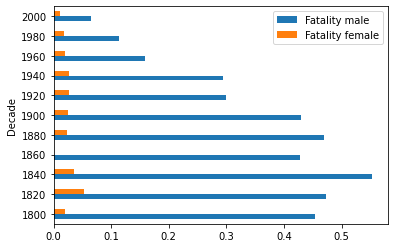

In [18]:
decade_sex_fatal=data.groupby(["Decade"]).agg({'Fatality male':"mean", 'Fatality female':"mean"})
decade_sex_fatal.plot.barh()
decade_sex_fatal

*Tras analizar estos datos, podemos observar que la diferencia de ataques entre hombres y mujeres se ha mantenido igual durante las diferentes décadas.*

**¿Cúal es el porcentaje de mujeres y hombres fallecidos por categoría de edad?**

,Fatality female,Fatality male
Age Category,,
Adults,0.017921,0.131422
Elderly,0.111111,0.185185
Teens,0.016379,0.159236
Young,0.015504,0.165891


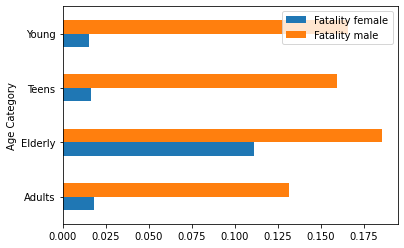

In [19]:
season_sex_fatal=data.groupby("Age Category").agg({"Fatality female":"mean", "Fatality male":"mean"})
season_sex_fatal.plot.barh()
season_sex_fatal

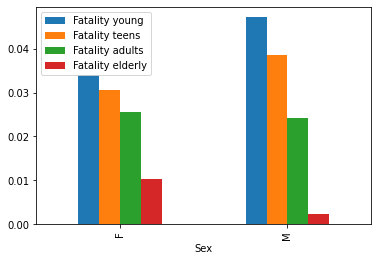

In [20]:
data.groupby("Sex").agg({
        "Fatality young":"mean", 
        "Fatality teens":"mean",
        "Fatality adults":"mean",
        "Fatality elderly":"mean",
}).plot.bar()